In [4]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
model_root_and_name_tuple_list = [("dbnsfp", "sift"), ("dbnsfp", "polyphen2_HVAR"), ("dbnsfp", "cadd"), ("dbnsfp", "mvp"), ("dbnsfp", "metarnn"), ("dbnsfp", "revel"),
                                  ("tape_rao", "unirep"), ("tape_rao", "protbert"), ("sequnet_dunham", "sequnet"), 
                                  ("esm_rives", "esm1b_t33_650M_UR50S"), ("esm_rives", "esm1v_t33_650M_UR90S"), ("esm_rives", "esm2_t33_650M_UR50D"),
                                  ("bioembeddings_dallago", "plus_rnn"), 
                                  ("bioembeddings_dallago", "prottrans_bert_bfd"), ("bioembeddings_dallago", "prottrans_albert_bfd"),
                                  ("bioembeddings_dallago", "prottrans_xlnet_uniref100"), 
                                  ("bioembeddings_dallago", "prottrans_t5_bfd"), ("bioembeddings_dallago", "prottrans_t5_uniref50"), ("bioembeddings_dallago", "prottrans_t5_xl_u50"),
                                  ("vespa_marquet", "vespal"), 
                                  ("", "random_classifier"), ("", "conservation")]

In [140]:
PROPS = {'boxprops':{'facecolor':'white', 'edgecolor':'black', 'zorder': 2}}
#     'medianprops':{'color':'green'},
#     'whiskerprops':{'color':'blue'},
#     'capprops':{'color':'yellow'}
# }

def do_violin_plot(result_df, model_name, out_dir):
    df = result_df.copy(deep=True)
    plt.cla()

    sns.boxplot(data=result_df, x="class", y="pred", width=0.08, fliersize=.5, **PROPS)# flierprops={"marker": ""}) **PROPS
    sns.violinplot(data=result_df, x="class", y="pred", inner=None)
    
    
    plt.ylabel(model_name + " (scaled)")
    plt.xlabel("")

    # plt.show()
    plt.savefig(home_dir+f"models/aa_common/{out_dir}/{model_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)

def violin_plot_for_all_methods(result_df, out_dir, task):
    for i, (model_root, model_name) in enumerate(model_root_and_name_tuple_list):
        # model_name = "esm2_t33_650M_UR50D"
        print(model_name)
        if task == "pmd":
            if model_name == "vespal": model_name="vespa"
            if model_name == "conservation": continue
            
        model_pred_col = model_name + "_pred"
        if model_name=="random_classifier": 
            result_df[model_pred_col] = [random.uniform(0,1) for i in range(result_df.shape[0])]
            
        result_df["pred"]=(result_df[model_pred_col]-result_df[model_pred_col].min())/(result_df[model_pred_col].max()-result_df[model_pred_col].min()) # scaling prediction scores between [0, 1]
        do_violin_plot(result_df, model_name, out_dir)
        # break

### Violin plots for PMD

In [141]:
task = "pmd"
result_df = pd.read_csv(home_dir+f"models/aa_common/merged_predictions/{task}.tsv", sep="\t")
result_df.rename(columns={"functional_effect": "class"}, inplace=True)
print(result_df.shape)
print(result_df.columns)
result_df["class"].value_counts()

(60306, 53)
Index(['mut_id', 'pmd_id', 'nr', 'crossref', 'uniprot_id', 'ensembl_id',
       'taxid', 'protein', 'mut_PMD', 'mut_real', 'wt', 'mut', 'prot_pos',
       'function_summarized', 'class', 'function', 'seq', 'snp_id', 'mrna_acc',
       'mrna_ver', 'mrna_pos', 'allele', 'protein_acc', 'protein_ver',
       'verified', 'chrom', 'chrom_pos', 'variation', 'variant_type',
       'ref_allele', 'alt_allele', 'pmd_nr_id', 'sift_pred',
       'polyphen2_HVAR_pred', 'cadd_pred', 'mvp_pred', 'metarnn_pred',
       'revel_pred', 'unirep_pred', 'protbert_pred', 'sequnet_pred',
       'esm1b_t33_650M_UR50S_pred', 'esm1v_t33_650M_UR90S_pred',
       'esm2_t33_650M_UR50D_pred', 'plus_rnn_pred', 'prottrans_bert_bfd_pred',
       'prottrans_albert_bfd_pred', 'prottrans_xlnet_uniref100_pred',
       'prottrans_t5_bfd_pred', 'prottrans_t5_uniref50_pred',
       'prottrans_t5_xl_u50_pred', 'vespa_pred', 'sift_snpdbe_pred'],
      dtype='object')


Effect       30774
No-effect    15442
Knock-out    14090
Name: class, dtype: int64

sift
polyphen2_HVAR
cadd
mvp
metarnn
revel
unirep
protbert
sequnet
esm1b_t33_650M_UR50S
esm1v_t33_650M_UR90S
esm2_t33_650M_UR50D
plus_rnn
prottrans_bert_bfd
prottrans_albert_bfd
prottrans_xlnet_uniref100
prottrans_t5_bfd
prottrans_t5_uniref50
prottrans_t5_xl_u50
vespal
random_classifier
conservation


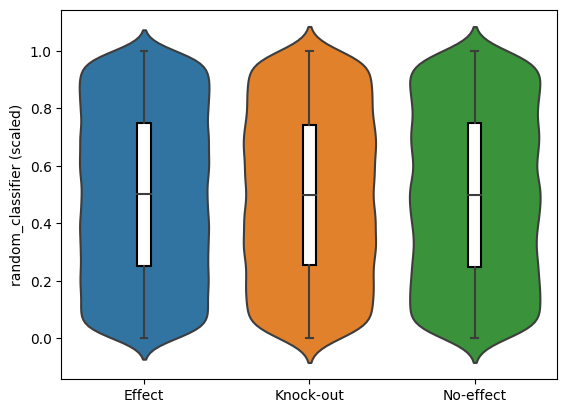

In [142]:
violin_plot_for_all_methods(result_df, "violin_plots_pmd_analysis", task)

### Violin plots for pathogenicity

In [143]:
columns = ['id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
            'prot_acc_version', 'prot_pos', 'wt', 'mut', 'class', 'sift_pred',
            'polyphen2_HVAR_pred', 'cadd_pred', 'mvp_pred', 'metarnn_pred',
            'revel_pred', 'unirep_pred', 'protbert_pred', 'sequnet_pred',
            'esm1b_t33_650M_UR50S_pred', 'esm1v_t33_650M_UR90S_pred',
            'esm2_t33_650M_UR50D_pred', 'plus_rnn_pred', 'prottrans_bert_bfd_pred',
            'prottrans_albert_bfd_pred', 'prottrans_xlnet_uniref100_pred',
            'prottrans_t5_bfd_pred', 'prottrans_t5_uniref50_pred',
            'prottrans_t5_xl_u50_pred', 'vespal_pred', 'conservation_pred']

task = "patho_and_likelypatho" 

patho_and_likelypatho_result_df = pd.read_csv(home_dir+f"models/aa_common/merged_predictions/{task}_analysis.csv", sep="\t")
patho_and_likelypatho_result_df = patho_and_likelypatho_result_df.rename(columns={"clinvar_id":"id"})
patho_and_likelypatho_result_df = patho_and_likelypatho_result_df[columns]
patho_and_likelypatho_result_df.loc[patho_and_likelypatho_result_df["class"]=="likely_pathogenic", "class"] = "Likely-pathogenic"
patho_and_likelypatho_result_df.loc[patho_and_likelypatho_result_df["class"]=="pathogenic", "class"] = "Pathogenic"


popu_freq_result_df = pd.read_csv(home_dir+f"models/aa_common/merged_predictions/popu_freq_analysis.csv", sep="\t")
popu_freq_result_df = popu_freq_result_df[(popu_freq_result_df["class"]=="Common") | (popu_freq_result_df["class"]=="Rare")]
popu_freq_result_df["class"] = "Neutral"
popu_freq_result_df = popu_freq_result_df.rename(columns={"snp_id":"id"})
popu_freq_result_df = popu_freq_result_df[columns]


patho_and_likelypatho_result_df_unique_prots_list = patho_and_likelypatho_result_df["prot_acc_version"].unique()
popu_freq_result_df = popu_freq_result_df[popu_freq_result_df["prot_acc_version"].isin(patho_and_likelypatho_result_df_unique_prots_list)] # variants must be of same proteins/genes from patho_and_likelypatho

# print(popu_freq_result_df.shape)
# print(popu_freq_result_df.columns)

# print(patho_and_likelypatho_result_df.shape)
# print(patho_and_likelypatho_result_df.columns)

result_df = pd.concat([popu_freq_result_df, patho_and_likelypatho_result_df])
print(result_df.shape)
print(result_df.columns)
result_df['class'].value_counts()

(10115, 31)
Index(['id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'class', 'sift_pred',
       'polyphen2_HVAR_pred', 'cadd_pred', 'mvp_pred', 'metarnn_pred',
       'revel_pred', 'unirep_pred', 'protbert_pred', 'sequnet_pred',
       'esm1b_t33_650M_UR50S_pred', 'esm1v_t33_650M_UR90S_pred',
       'esm2_t33_650M_UR50D_pred', 'plus_rnn_pred', 'prottrans_bert_bfd_pred',
       'prottrans_albert_bfd_pred', 'prottrans_xlnet_uniref100_pred',
       'prottrans_t5_bfd_pred', 'prottrans_t5_uniref50_pred',
       'prottrans_t5_xl_u50_pred', 'vespal_pred', 'conservation_pred'],
      dtype='object')


Likely-pathogenic    4168
Neutral              3639
Pathogenic           2308
Name: class, dtype: int64

sift
polyphen2_HVAR
cadd
mvp
metarnn
revel
unirep
protbert
sequnet
esm1b_t33_650M_UR50S
esm1v_t33_650M_UR90S
esm2_t33_650M_UR50D
plus_rnn
prottrans_bert_bfd
prottrans_albert_bfd
prottrans_xlnet_uniref100
prottrans_t5_bfd
prottrans_t5_uniref50
prottrans_t5_xl_u50
vespal
random_classifier
conservation


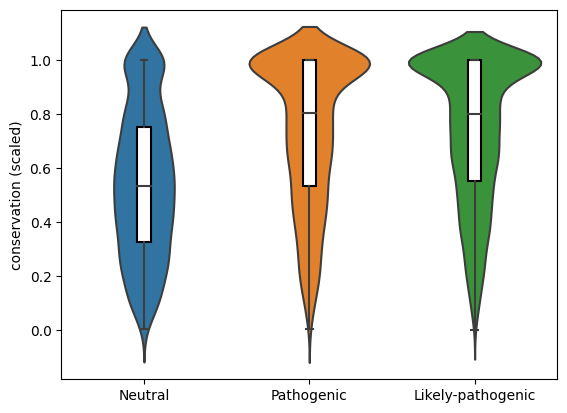

In [144]:
violin_plot_for_all_methods(result_df, "violin_plots_pathogenicity_analysis", task)

### Violin plots for popu-freq

In [145]:
task = "popu_freq"
result_df = pd.read_csv(home_dir+f"models/aa_common/merged_predictions/{task}_analysis.csv", sep="\t")
result_df = result_df[result_df["class"]!="Zero-population"]
print(result_df.shape)
print(result_df.columns)
result_df['class'].value_counts()

(823246, 35)
Index(['snp_id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'class', 'sift_pred',
       'polyphen2_HVAR_pred', 'cadd_pred', 'mvp_pred', 'metarnn_pred',
       'revel_pred', 'unirep_pred', 'protbert_pred', 'sequnet_pred',
       'esm1b_t33_650M_UR50S_pred', 'esm1v_t33_650M_UR90S_pred',
       'esm2_t33_650M_UR50D_pred', 'plus_rnn_pred', 'prottrans_bert_bfd_pred',
       'prottrans_albert_bfd_pred', 'prottrans_xlnet_uniref100_pred',
       'prottrans_t5_bfd_pred', 'prottrans_t5_uniref50_pred',
       'prottrans_t5_xl_u50_pred', 'vespal_pred', 'conservation_pred'],
      dtype='object')


Singleton     462444
Ultra-rare    314013
Rare           28622
Common         18167
Name: class, dtype: int64

sift
polyphen2_HVAR
cadd
mvp
metarnn
revel
unirep
protbert
sequnet
esm1b_t33_650M_UR50S
esm1v_t33_650M_UR90S
esm2_t33_650M_UR50D
plus_rnn
prottrans_bert_bfd
prottrans_albert_bfd
prottrans_xlnet_uniref100
prottrans_t5_bfd
prottrans_t5_uniref50
prottrans_t5_xl_u50
vespal
random_classifier
conservation


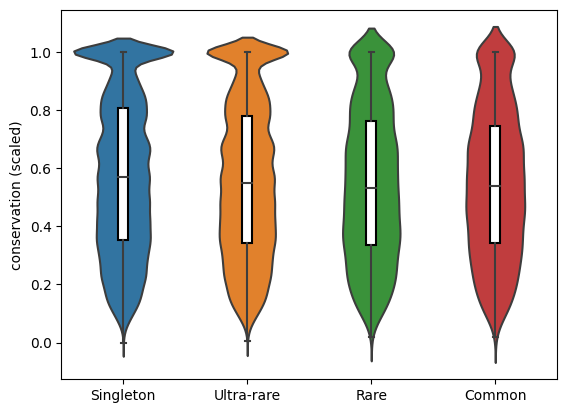

In [146]:
violin_plot_for_all_methods(result_df, "violin_plots_popu_freq_analysis", task)